<a href="https://colab.research.google.com/github/ace2884/mlds-lab/blob/main/Week4(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
print(X)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']
print(y)

     Targets
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [ ]:
# Build the KMeans Model
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X)
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [ ]:
for i in range(3):
    cat = (clusters == i)
    labels[cat] = mode(iris.target[cat])[0]
    print(cat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[False False False False False False False False False False False False
 False False 

In [ ]:
acc = accuracy_score(iris.target, labels)
print('Accuracy = ', acc)

Accuracy =  0.8933333333333333


In [ ]:
plt.figure(figsize=(10,10))
colormap = np.array(['red', 'lime', 'blue'])

<Figure size 1000x1000 with 0 Axes>

Text(0, 0.5, 'Petal Width')

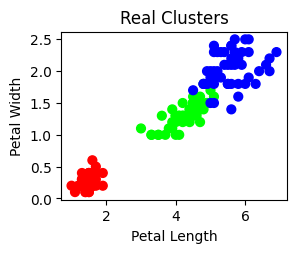

In [ ]:
# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Width')

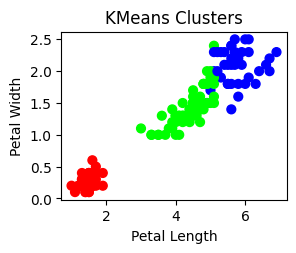

In [ ]:
# Plot KMeans Model Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[labels], s = 40)
#plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

In [ ]:
# General EM for GMM
from sklearn import preprocessing

In [ ]:
# transform data such that the distribution mean = 0 and std = 1
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

In [ ]:
xs = pd.DataFrame(scaled_X, columns = X.columns)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm_y = gmm.fit_predict(xs)

In [ ]:
labels = np.zeros_like(clusters)

In [ ]:
for i in range(3):
    cat = (gmm_y == i)
    labels[cat] = mode(iris.target[cat])[0]

In [ ]:
acc = accuracy_score(iris.target, labels)
print("Accuracy using GMM = ", acc)

Accuracy using GMM =  0.9666666666666667


Text(0, 0.5, 'Petal Width')

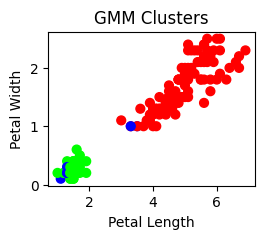

In [ ]:
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c = colormap[gmm_y], s = 40)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.title('GMM Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')